# Distributions
:label:`sec_distributions`

Now that we have learned how to work with probability in both the discrete and the continuous setting, let's get to know some of the common distributions encountered.  Depending on the area of machine learning, we may need to be familiar with vastly more of these, or for some areas of deep learning potentially none at all.  This is, however, a good basic list to be familiar with.  Let's first import some common libraries.

In [24]:
# from d2l import torch as d2l

In [3]:
import math
# from math import erf, factorial

from IPython import display
import matplotlib.pyplot as plt

import torch

plt.rcParams.update({
    'figure.figsize': (3.5, 2.5),
    'axes.grid': True
})

%matplotlib inline

## Bernoulli

This is the simplest random variable usually encountered.  **This random variable encodes a coin flip which comes up $1$ with probability $p$ and $0$ with probability $1-p$**.  If we have a random variable $X$ with this distribution, we will write

$$
X \sim \textrm{Bernoulli}(p).
$$

The cumulative distribution function is 

$$F(x) = \begin{cases} 0 & x < 0, \\ 1-p & 0 \le x < 1, \\ 1 & x >= 1 . \end{cases}$$
:eqlabel:`eq_bernoulli_cdf`

The probability mass function is plotted below.

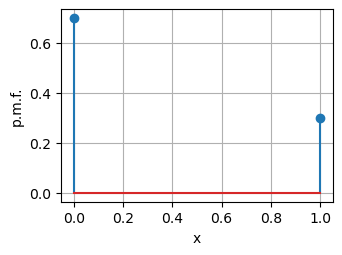

In [4]:
p = 0.3

plt.stem([0, 1], [1 - p, p])
plt.xlabel('x')
plt.ylabel('p.m.f.')
plt.show()

Now, let's plot the cumulative distribution function :eqref:`eq_bernoulli_cdf`.

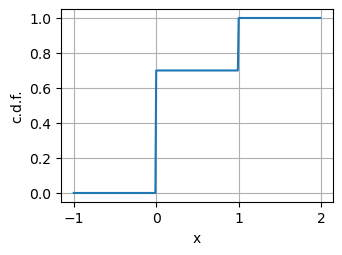

In [5]:
x = torch.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x >= 1 else 1 - p

plt.plot(x, torch.tensor([F(y) for y in x]))
plt.xlabel('x')
plt.ylabel('c.d.f.')
plt.show()

If $X \sim \textrm{Bernoulli}(p)$, then:

* $\mu_X = p$,
* $\sigma_X^2 = p(1-p)$.

We can sample an array of arbitrary shape from a Bernoulli random variable as follows.

In [6]:
(torch.rand(10, 10) < p).byte()

tensor([[1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]], dtype=torch.uint8)

## Discrete Uniform

The next commonly encountered random variable is a discrete uniform. For our discussion here, we will assume that it is supported on the integers $\{1, 2, \ldots, n\}$, however any other set of values can be freely chosen.  **The meaning of the word *uniform* in this context is that every possible value is equally likely.  The probability for each value $i \in \{1, 2, 3, \ldots, n\}$ is $p_i = \frac{1}{n}$.** We will denote a random variable $X$ with this distribution as

$$
X \sim U(n).
$$

The cumulative distribution function is 

$$F(x) = \begin{cases} 0 & x < 1, \\ \frac{k}{n} & k \le x < k+1 \textrm{ with } 1 \le k < n, \\ 1 & x >= n . \end{cases}$$
:eqlabel:`eq_discrete_uniform_cdf`

Let's first plot the probability mass function.

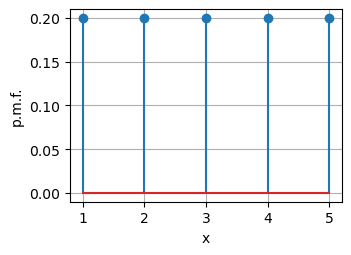

In [7]:
n = 5

plt.stem([i + 1 for i in range(n)], n*[1 / n])
plt.xlabel('x')
plt.ylabel('p.m.f.')
plt.show()

Now, let's plot the cumulative distribution function :eqref:`eq_discrete_uniform_cdf`.

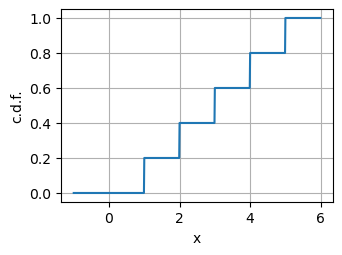

In [8]:
x = torch.arange(-1, 6, 0.01)

def F(x):
    return 0 if x < 1 else 1 if x >= n else torch.floor(x) / n

plt.plot(x, torch.tensor([F(y) for y in x]))
plt.xlabel('x')
plt.ylabel('c.d.f.')
plt.show()

If $X \sim U(n)$, then:

* $\mu_X = \frac{1+n}{2}$,
* $\sigma_X^2 = \frac{n^2-1}{12}$.

We can sample an array of arbitrary shape from a discrete uniform random variable as follows.

In [9]:
torch.randint(1, n, size=(10, 10))

tensor([[3, 4, 1, 2, 1, 1, 2, 2, 4, 4],
        [3, 2, 4, 1, 3, 3, 3, 3, 1, 3],
        [4, 2, 3, 4, 1, 1, 4, 1, 1, 2],
        [2, 1, 1, 3, 2, 4, 2, 3, 4, 3],
        [2, 1, 4, 3, 3, 4, 3, 4, 1, 4],
        [4, 3, 2, 2, 4, 1, 4, 4, 4, 2],
        [2, 2, 4, 2, 1, 3, 1, 4, 3, 1],
        [1, 3, 4, 4, 3, 3, 4, 2, 3, 4],
        [4, 4, 1, 4, 4, 4, 1, 4, 3, 3],
        [2, 4, 4, 2, 4, 1, 2, 1, 2, 4]])

## Continuous Uniform

Next, let's discuss the continuous uniform distribution. **The idea behind this random variable is that if we increase the $n$ in the discrete uniform distribution, and then scale it to fit within the interval $[a, b]$**, we will approach a continuous random variable that just picks an arbitrary value in $[a, b]$ all with equal probability.  We will denote this distribution as

$$
X \sim U(a, b).
$$

The probability density function is 

$$p(x) = \begin{cases} \frac{1}{b-a} & x \in [a, b], \\ 0 & x \not\in [a, b].\end{cases}$$
:eqlabel:`eq_cont_uniform_pdf`

The cumulative distribution function is 

$$F(x) = \begin{cases} 0 & x < a, \\ \frac{x-a}{b-a} & x \in [a, b], \\ 1 & x >= b . \end{cases}$$
:eqlabel:`eq_cont_uniform_cdf`

Let's first plot the probability density function :eqref:`eq_cont_uniform_pdf`.

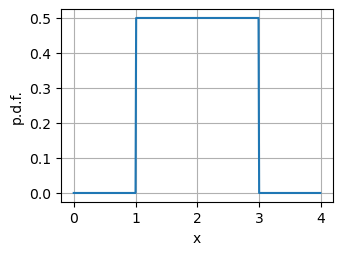

In [10]:
a, b = 1, 3

x = torch.arange(0, 4, 0.01)
p = (x > a) * (x < b) / (b-a)

plt.plot(x, p)
plt.xlabel('x')
plt.ylabel('p.d.f.')
plt.show()

Now, let's plot the cumulative distribution function :eqref:`eq_cont_uniform_cdf`.

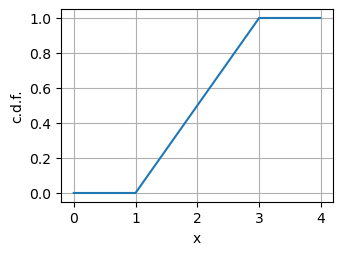

In [11]:
def F(x):
    return 0 if x < a else 1 if x > b else (x - a) / (b - a)

plt.plot(x, torch.tensor([F(y) for y in x]))
plt.xlabel('x')
plt.ylabel('c.d.f.')
plt.show()

If $X \sim U(a, b)$, then:

* $\mu_X = \frac{a+b}{2}$,
* $\sigma_X^2 = \frac{(b-a)^2}{12}$.

We can sample an array of arbitrary shape from a uniform random variable as follows.  Note that it by default samples from a $U(0,1)$, so if we want a different range we need to scale it.

In [12]:
(b - a) * torch.rand(10, 10) + a

tensor([[1.3381, 2.0712, 2.3497, 1.6431, 2.6537, 1.6762, 2.9952, 1.8874, 2.4992,
         2.6568],
        [2.4774, 1.2567, 2.3647, 2.0650, 1.1937, 1.2935, 2.7579, 2.0129, 2.1700,
         2.2072],
        [2.7034, 1.7266, 2.2023, 1.0385, 1.3714, 2.3810, 2.9916, 2.4325, 1.5236,
         2.6830],
        [2.0348, 1.3262, 2.3365, 1.1038, 1.1640, 1.6320, 1.7204, 1.4767, 2.8038,
         1.7549],
        [2.9482, 1.0343, 1.8230, 1.3215, 2.4497, 1.4506, 1.3356, 1.4109, 1.6636,
         2.8315],
        [2.7203, 1.0391, 2.2305, 2.5527, 1.7778, 1.6577, 2.8371, 2.8187, 2.6151,
         1.0334],
        [2.5908, 2.9894, 1.9401, 1.4656, 1.4390, 2.1652, 2.3107, 2.2824, 1.0013,
         1.5135],
        [2.4061, 2.6080, 1.7505, 2.8089, 1.9598, 1.3305, 1.5618, 2.5765, 1.0224,
         2.2171],
        [1.6319, 2.2109, 2.5850, 1.0245, 2.2365, 2.1903, 1.1832, 1.0180, 1.1274,
         1.5645],
        [1.9485, 1.9363, 2.2161, 1.2616, 2.4399, 1.7422, 2.3631, 2.2887, 1.9945,
         1.1133]])

## Binomial

Let's make things a little more complex and examine the *binomial* random variable. **This random variable originates from performing a sequence of $n$ independent experiments, each of which has probability $p$ of succeeding, and asking how many successes we expect to see.**

Let's express this mathematically. **Each experiment is an independent random variable $X_i$ where we will use $1$ to encode success, and $0$ to encode failure.  Since each is an independent coin flip which is successful with probability $p$, we can say that $X_i \sim \textrm{Bernoulli}(p)$.**  Then, the binomial random variable is

$$
X = \sum_{i=1}^n X_i.
$$

In this case, we will write

$$
X \sim \textrm{Binomial}(n, p).
$$

To get the cumulative distribution function, we need to notice that getting exactly $k$ successes can occur in $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ ways each of which has a probability of $p^k(1-p)^{n-k}$ of occurring.  Thus the cumulative distribution function is

$$F(x) = \begin{cases} 0 & x < 0, \\ \sum_{m \le k} \binom{n}{m} p^m(1-p)^{n-m}  & k \le x < k+1 \textrm{ with } 0 \le k < n, \\ 1 & x >= n . \end{cases}$$
:eqlabel:`eq_binomial_cdf`

Let's first plot the probability mass function.

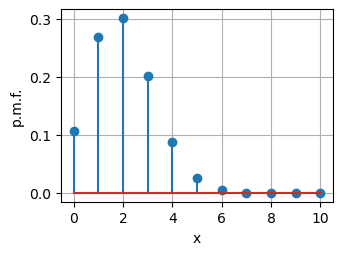

In [76]:
n, p = 10, 0.2

x = [i for i in range(n + 1)]
pmf = torch.tensor([math.comb(n, i) * p**i * (1 - p)**(n - i) for i in x])

plt.stem(x, pmf)
plt.xlabel('x')
plt.ylabel('p.m.f.')
plt.show()

Now, let's plot the cumulative distribution function :eqref:`eq_binomial_cdf`.

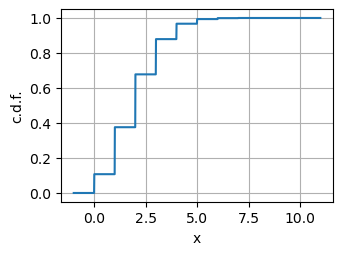

In [78]:
x = torch.arange(-1, 11, 0.01)
cmf = torch.cumsum(pmf, dim=0)

def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

plt.plot(x, torch.tensor([F(y) for y in x.tolist()]))
plt.xlabel('x')
plt.ylabel('c.d.f.')
plt.show()

If $X \sim \textrm{Binomial}(n, p)$, then:

* $\mu_X = np$,
* $\sigma_X^2 = np(1-p)$.

This follows from the linearity of expected value over the sum of $n$ Bernoulli random variables, and the fact that the variance of the sum of independent random variables is the sum of the variances. This can be sampled as follows.

In [15]:
m = torch.distributions.binomial.Binomial(n, p)
m.sample(sample_shape=(10, 10)).int()

tensor([[2, 3, 2, 1, 3, 2, 0, 2, 3, 2],
        [3, 0, 1, 4, 4, 0, 3, 4, 2, 1],
        [1, 2, 5, 2, 2, 4, 3, 1, 1, 0],
        [2, 1, 2, 2, 3, 0, 2, 0, 4, 2],
        [2, 2, 3, 2, 2, 3, 2, 0, 3, 2],
        [0, 3, 0, 2, 4, 2, 1, 2, 0, 1],
        [1, 6, 3, 1, 1, 2, 0, 2, 1, 2],
        [2, 1, 4, 2, 2, 1, 3, 3, 1, 0],
        [1, 3, 1, 3, 4, 2, 0, 1, 0, 1],
        [1, 0, 3, 1, 2, 0, 3, 1, 1, 4]], dtype=torch.int32)

## Poisson
Let's now perform a thought experiment.  We are standing at a bus stop and we want to know how many buses will arrive in the next minute.  Let's start by considering $X^{(1)} \sim \textrm{Bernoulli}(p)$ which is simply the probability that a bus arrives in the one minute window.  For bus stops far from an urban center, this might be a pretty good approximation.  We may never see more than one bus in a minute.

However, if we are in a busy area, it is possible or even likely that two buses will arrive.  We can model this by splitting our random variable into two parts for the first 30 seconds, or the second 30 seconds.  In this case we can write

$$
X^{(2)} \sim X^{(2)}_1 + X^{(2)}_2,
$$

where $X^{(2)}$ is the total sum, and $X^{(2)}_i \sim \textrm{Bernoulli}(p/2)$.  The total distribution is then $X^{(2)} \sim \textrm{Binomial}(2, p/2)$.

Why stop here?  Let's continue to split that minute into $n$ parts.  By the same reasoning as above, we see that

$$X^{(n)} \sim \textrm{Binomial}(n, p/n).$$
:eqlabel:`eq_eq_poisson_approx`

Consider these random variables.  By the previous section, we know that :eqref:`eq_eq_poisson_approx` has mean $\mu_{X^{(n)}} = n(p/n) = p$, and variance $\sigma_{X^{(n)}}^2 = n(p/n)(1-(p/n)) = p(1-p/n)$.  If we take $n \rightarrow \infty$, we can see that these numbers stabilize to $\mu_{X^{(\infty)}} = p$, and variance $\sigma_{X^{(\infty)}}^2 = p$.  This indicates that there *could be* some random variable we can define in this infinite subdivision limit.  

This should not come as too much of a surprise, since in the real world we can just count the number of bus arrivals, however it is nice to see that our mathematical model is well defined.  This discussion can be made formal as the *law of rare events*.

Following through this reasoning carefully, we can arrive at the following model.  **We will say that $X \sim \textrm{Poisson}(\lambda)$ if it is a random variable which takes the values $\{0,1,2, \ldots\}$ with probability**

$$p_k = \frac{\lambda^ke^{-\lambda}}{k!}.$$
:eqlabel:`eq_poisson_mass`

**The value $\lambda > 0$ is known as the *rate* (or the *shape* parameter), and denotes the average number of arrivals we expect in one unit of time.**

We may sum this probability mass function to get the cumulative distribution function.

$$F(x) = \begin{cases} 0 & x < 0, \\ e^{-\lambda}\sum_{m = 0}^k \frac{\lambda^m}{m!} & k \le x < k+1 \textrm{ with } 0 \le k. \end{cases}$$
:eqlabel:`eq_poisson_cdf`

Let's first plot the probability mass function :eqref:`eq_poisson_mass`.

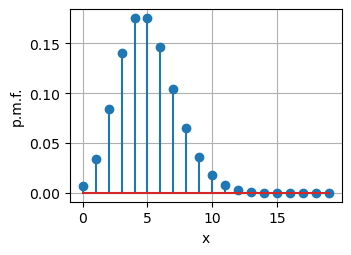

In [82]:
lam = 5.0

xs = [i for i in range(20)]
pmf = torch.tensor([torch.exp(torch.tensor(-lam)) * lam**k
                    / math.factorial(k) for k in xs])

plt.stem(xs, pmf)
plt.xlabel('x')
plt.ylabel('p.m.f.')
plt.show()

Now, let's plot the cumulative distribution function :eqref:`eq_poisson_cdf`.

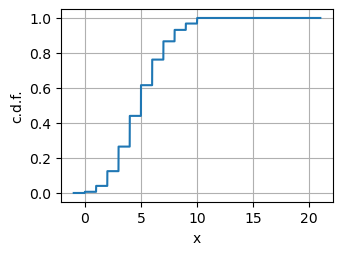

In [83]:
x = torch.arange(-1, 21, 0.01)
cmf = torch.cumsum(pmf, dim=0)

def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

plt.plot(x, torch.tensor([F(y) for y in x]))
plt.xlabel('x')
plt.ylabel('c.d.f.')
plt.show()

As we saw above, the means and variances are particularly concise.  If $X \sim \textrm{Poisson}(\lambda)$, then:

* $\mu_X = \lambda$,
* $\sigma_X^2 = \lambda$.

This can be sampled as follows.

In [18]:
m = torch.distributions.poisson.Poisson(lam)
m.sample((10, 10))

tensor([[ 2.,  5.,  5.,  4.,  6.,  6., 10.,  6.,  8.,  7.],
        [ 1.,  3.,  4.,  6.,  3.,  3.,  3.,  7.,  1.,  4.],
        [ 3.,  8.,  5.,  8.,  9.,  5.,  5.,  1.,  2.,  9.],
        [ 8.,  2.,  3.,  7.,  6.,  6.,  5.,  6.,  3.,  6.],
        [ 7.,  4.,  5., 11.,  6.,  6.,  4.,  3.,  6.,  5.],
        [ 2.,  7.,  5.,  7.,  4.,  4.,  5.,  3.,  1.,  3.],
        [ 6.,  8.,  2.,  4.,  5.,  4.,  6.,  4.,  8.,  8.],
        [ 9.,  5.,  5.,  2.,  6.,  6.,  4.,  7.,  3.,  4.],
        [ 4.,  6.,  8.,  6.,  4., 10.,  6.,  4.,  3.,  4.],
        [ 4.,  7.,  3.,  6.,  4.,  7.,  5.,  2.,  2.,  8.]])

## Gaussian
Now Let's try a different, but related experiment.  Let's say we again are performing $n$ independent $\textrm{Bernoulli}(p)$ measurements $X_i$.  The distribution of the sum of these is $X^{(n)} \sim \textrm{Binomial}(n, p)$.  Rather than taking a limit as $n$ increases and $p$ decreases, Let's fix $p$, and then send $n \rightarrow \infty$.  In this case $\mu_{X^{(n)}} = np \rightarrow \infty$ and $\sigma_{X^{(n)}}^2 = np(1-p) \rightarrow \infty$, so there is no reason to think this limit should be well defined.

However, not all hope is lost!  Let's just make the mean and variance be well behaved by defining

$$
Y^{(n)} = \frac{X^{(n)} - \mu_{X^{(n)}}}{\sigma_{X^{(n)}}}.
$$

*This can be seen to have mean zero and variance one, and so it is plausible to believe that it will converge to some limiting distribution.* If we plot what these distributions look like, we will become even more convinced that it will work.

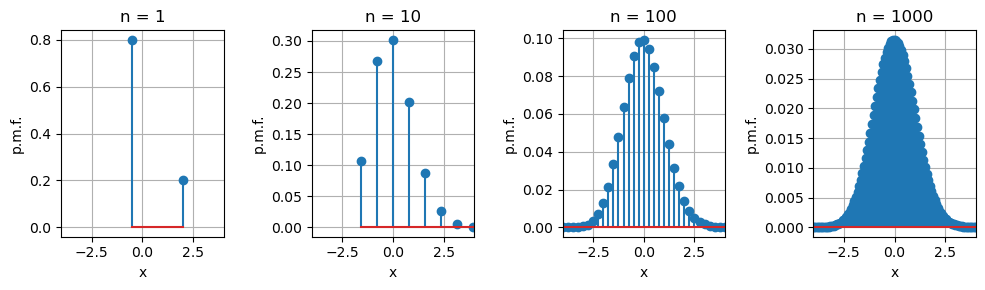

In [49]:
p = 0.2
ns = [1, 10, 100, 1000]
plt.figure(figsize=(10, 3))

for k in range(4):
    n = ns[k]
    pmf = torch.tensor([math.comb(n, i) * p**i * (1-p)**(n-i) for i in range(n + 1)])

    plt.subplot(1, 4, k + 1)
    plt.stem([(i - n*p) / (n*p*(1 - p))**0.5 for i in range(n + 1)], pmf)
    plt.xlim([-4, 4])
    plt.xlabel('x')
    plt.ylabel('p.m.f.')
    plt.title("n = {}".format(n))

plt.tight_layout()
plt.show()

One thing to note: compared to the Poisson case, we are now dividing by the standard deviation which means that we are squeezing the possible outcomes into smaller and smaller areas.  This is an indication that our limit will no longer be discrete, but rather continuous.

A derivation of what occurs is beyond the scope of this document, but the *central limit theorem* states that as $n \rightarrow \infty$, this will yield the Gaussian Distribution (or sometimes normal distribution).  More explicitly, for any $a, b$:

$$
\lim_{n \rightarrow \infty} P(Y^{(n)} \in [a, b]) = P(\mathcal{N}(0,1) \in [a, b]),
$$

where we say a random variable is normally distributed with given mean $\mu$ and variance $\sigma^2$, written $X \sim \mathcal{N}(\mu, \sigma^2)$ if $X$ has density

$$p_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.$$
:eqlabel:`eq_gaussian_pdf`

Let's first plot the probability density function :eqref:`eq_gaussian_pdf`.

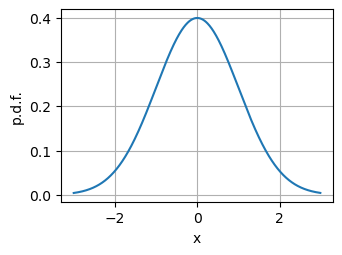

In [52]:
mu, sigma = 0, 1

x = torch.arange(-3, 3, 0.01)
p = 1 / torch.sqrt(torch.tensor(2 * torch.pi * sigma**2)) * torch.exp(-(x - mu)**2 / (2 * sigma**2))

plt.plot(x, p)
plt.xlabel('x')
plt.ylabel('p.d.f.')
plt.show()

Now, let's plot the cumulative distribution function.  It is beyond the scope of this appendix, but the Gaussian c.d.f. does not have a closed-form formula in terms of more elementary functions.  We will use `erf` which provides a way to compute this integral numerically.

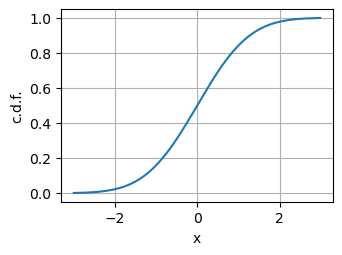

In [53]:
def phi(x):
    return (1.0 + math.erf((x - mu) / (sigma * torch.sqrt(torch.tensor(2.))))) / 2.0

plt.plot(x, torch.tensor([phi(y) for y in x.tolist()]))
plt.xlabel('x')
plt.ylabel('c.d.f.')
plt.show()

Keen-eyed readers will recognize some of these terms.  Indeed, we encountered this integral in :numref:`sec_integral_calculus`.  Indeed we need exactly that computation to see that this $p_X(x)$ has total area one and is thus a valid density.

Our choice of working with coin flips made computations shorter, but nothing about that choice was fundamental.  Indeed, if we take any collection of independent identically distributed random variables $X_i$, and form

$$
X^{(N)} = \sum_{i=1}^N X_i.
$$

Then

$$
\frac{X^{(N)} - \mu_{X^{(N)}}}{\sigma_{X^{(N)}}}
$$

will be approximately Gaussian.  There are additional requirements needed to make it work, most commonly $E[X^4] < \infty$, but the philosophy is clear.

The central limit theorem is the reason why the Gaussian is fundamental to probability, statistics, and machine learning.  Whenever we can say that something we measured is a sum of many small independent contributions, we can assume that the thing being measured will be close to Gaussian.  

There are many more fascinating properties of Gaussians, and we would like to discuss one more here.  The Gaussian is what is known as a *maximum entropy distribution*.  We will get into entropy more deeply in :numref:`sec_information_theory`, however all we need to know at this point is that it is a measure of randomness.  In a rigorous mathematical sense, we can think of the Gaussian as the *most* random choice of random variable with fixed mean and variance.  Thus, if we know that our random variable has some mean and variance, the Gaussian is in a sense the most conservative choice of distribution we can make.

To close the section, let's recall that if $X \sim \mathcal{N}(\mu, \sigma^2)$, then:

* $\mu_X = \mu$,
* $\sigma_X^2 = \sigma^2$.

We can sample from the Gaussian (or standard normal) distribution as shown below.

In [54]:
torch.normal(mu, sigma, size=(10, 10))

tensor([[-6.1125e-01, -1.3400e+00, -9.4665e-01,  5.6185e-01, -1.4560e+00,
          7.2864e-01, -1.2996e+00,  1.0184e+00,  6.3952e-01, -1.3464e+00],
        [-1.5259e-02,  1.8392e+00, -1.0987e-01,  7.7318e-01,  2.5348e+00,
         -2.4190e-01,  2.8355e+00, -1.8192e+00, -1.4981e+00,  6.1563e-01],
        [ 2.0222e+00, -1.7538e+00, -1.8698e-01,  5.0242e-01, -6.1279e-01,
         -2.0386e-01, -8.1535e-01,  1.2056e+00,  1.5563e+00,  5.2351e-01],
        [ 3.4940e-01,  1.8701e+00, -3.8790e-01,  1.2538e-01,  1.5434e+00,
         -1.4827e+00,  1.9220e+00,  5.9542e-03,  2.0094e+00, -3.4048e-02],
        [ 1.2639e+00,  5.4886e-02, -5.6938e-01, -8.2989e-01,  1.0610e+00,
         -2.9344e-02, -5.1270e-01,  1.4035e+00,  4.8558e-01,  3.1015e-01],
        [-6.6632e-01, -9.7090e-01, -4.5825e-01,  6.2126e-01,  2.4531e-01,
         -5.4957e-01, -2.3759e-01, -2.4450e-01, -4.9604e-01,  7.9599e-01],
        [ 1.0514e-01,  2.9256e-01,  2.6063e-03,  8.2386e-01,  5.7157e-01,
         -5.5150e-01,  6.8855e-0

## Exponential Family
:label:`subsec_exponential_family`

**One shared property for all the distributions listed above is that they all 
belong to which is known as the *exponential family*. The exponential family 
is a set of distributions whose density can be expressed in the following 
form:**

$$p(\mathbf{x} \mid \boldsymbol{\eta}) = h(\mathbf{x}) \cdot \exp \left( \boldsymbol{\eta}^{\top} \cdot T(\mathbf{x}) - A(\boldsymbol{\eta}) \right)$$
:eqlabel:`eq_exp_pdf`

As this definition can be a little subtle, let's examine it closely.  

First, $h(\mathbf{x})$ is known as the *underlying measure* or the 
*base measure*.  This can be viewed as an original choice of measure we are 
modifying with our exponential weight.  

Second, we have the vector $\boldsymbol{\eta} = (\eta_1, \eta_2, ..., \eta_l) \in
\mathbb{R}^l$ called the *natural parameters* or *canonical parameters*.  These
define how the base measure will be modified.  The natural parameters enter 
into the new measure by taking the dot product of these parameters against 
some function $T(\cdot)$ of $\mathbf{x}= (x_1, x_2, ..., x_n) \in
\mathbb{R}^n$ and exponentiated. The vector $T(\mathbf{x})= (T_1(\mathbf{x}),
T_2(\mathbf{x}), ..., T_l(\mathbf{x}))$ 
is called the *sufficient statistics* for $\boldsymbol{\eta}$. This name is used since the 
information represented by $T(\mathbf{x})$ is sufficient to calculate the 
probability density and no other information from the sample $\mathbf{x}$'s 
are required.

Third, we have $A(\boldsymbol{\eta})$, which is referred to as the *cumulant 
function*, which ensures that the above distribution :eqref:`eq_exp_pdf` 
integrates to one, i.e.,

$$A(\boldsymbol{\eta})  = \log \left[\int h(\mathbf{x}) \cdot \exp
\left(\boldsymbol{\eta}^{\top} \cdot T(\mathbf{x}) \right) d\mathbf{x} \right].$$

To be concrete, let's consider the Gaussian. Assuming that $\mathbf{x}$ is 
an univariate variable, we saw that it had a density of

$$
\begin{aligned}
p(x \mid \mu, \sigma) &= \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp 
\left\{ \frac{-(x-\mu)^2}{2 \sigma^2} \right\} \\
&= \frac{1}{\sqrt{2 \pi}} \cdot \exp \left\{ \frac{\mu}{\sigma^2}x
-\frac{1}{2 \sigma^2} x^2 - \left( \frac{1}{2 \sigma^2} \mu^2
+\log(\sigma) \right) \right\}.
\end{aligned}
$$

This matches the definition of the exponential family with:

* *underlying measure*: $h(x) = \frac{1}{\sqrt{2 \pi}}$,
* *natural parameters*: $\boldsymbol{\eta} = \begin{bmatrix} \eta_1 \\ \eta_2
\end{bmatrix} = \begin{bmatrix} \frac{\mu}{\sigma^2} \\
\frac{1}{2 \sigma^2} \end{bmatrix}$,
* *sufficient statistics*: $T(x) = \begin{bmatrix}x\\-x^2\end{bmatrix}$, and
* *cumulant function*: $A({\boldsymbol\eta}) = \frac{1}{2 \sigma^2} \mu^2 + \log(\sigma)
= \frac{\eta_1^2}{4 \eta_2} - \frac{1}{2}\log(2 \eta_2)$.

It is worth noting that the exact choice of each of above terms is somewhat 
arbitrary.  Indeed, the important feature is that the distribution can be 
expressed in this form, not the exact form itself.

As we allude to in :numref:`subsec_softmax_and_derivatives`, a widely used 
technique is to assume that the  final output $\mathbf{y}$ follows an 
exponential family distribution. The exponential family is a common and 
powerful family of distributions encountered frequently in machine learning.



## Summary
* Bernoulli random variables can be used to model events with a yes/no outcome.
* Discrete uniform distributions model selects from a finite set of possibilities.
* Continuous uniform distributions select from an interval.
* Binomial distributions model a series of Bernoulli random variables, and count the number of successes.
* Poisson random variables model the arrival of rare events.
* Gaussian random variables model the result of adding a large number of independent random variables together.
* All the above distributions belong to exponential family.

## Exercises

1. What is the standard deviation of a random variable that is the difference $X-Y$ of two independent binomial random variables $X, Y \sim \textrm{Binomial}(16, 1/2)$.
2. If we take a Poisson random variable $X \sim \textrm{Poisson}(\lambda)$ and consider $(X - \lambda)/\sqrt{\lambda}$ as $\lambda \rightarrow \infty$, we can show that this becomes approximately Gaussian.  Why does this make sense?
3. What is the probability mass function for a sum of two discrete uniform random variables on $n$ elements?


:begin_tab:`mxnet`
[Discussions](https://discuss.d2l.ai/t/417)
:end_tab:

:begin_tab:`pytorch`
[Discussions](https://discuss.d2l.ai/t/1098)
:end_tab:

:begin_tab:`tensorflow`
[Discussions](https://discuss.d2l.ai/t/1099)
:end_tab: